# Изучение особенностей задач поиска и локализации объектов на изображениях на основе библиотеки Detectron2
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/MVRonkin/for_course_DLCV/blob/main/workshops/WS9_Decetron2.ipynb)

In [ ]:
%load_ext autoreload
%autoreload 2

In [ ]:
import torch
TORCH_VERSION = ".".join(torch.__version__.split(".")[:2])
CUDA_VERSION  = torch.__version__.split("+")[-1]
print("torch: ", TORCH_VERSION, "; cuda: ", CUDA_VERSION)

сolab_requirements = ["pip install pyyaml==5.1",
                      "pip install --upgrade urllib3==1.25",                      
                      # "python -m pip install 'git+https://github.com/facebookresearch/detectron2.git'"
                      ]

import sys, subprocess

def run_subprocess_command(cmd):
    process = subprocess.Popen(cmd.split(), stdout=subprocess.PIPE)
    for line in process.stdout:
        print(line.decode().strip())

IN_COLAB = "google.colab" in sys.modules
if IN_COLAB:
    for i in сolab_requirements:
        run_subprocess_command(i)

torch:  1.11 ; cuda:  cu113
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Библиотека [Detectron2](https://detectron2.readthedocs.io/notes/benchmarks.html) является высоко-уровневой библиотекой на основе фреймворка `PyTorch` для решения таких задач, как:
* `object detection` (поиска объектов на изображениях), 
* `instance segmentation` (экземплярная сегментация объектов на изображениях), 
* `keypoint detection` (поиск ключевых точек), 
* `panoptic segmentation` (паноптическая сегментация). 

Библиотека разработана имеет открытый [исходный код](https://github.com/facebookresearch/Detectron2). 
<!-- В основе библиотеки лежат фреймворк pytorch и caffe2 (на котором написана [первая версия detectron](https://github.com/facebookresearch/Detectron)). -->

Полезные ссылки:
* репозиторий библиотеки https://github.com/facebookresearch/Detectron2;
* документация и сравнения с аналогичными фреймворками 
* репозиторий https://github.com/facebookresearch/detectron2/tree/master/projects;
* https://ai.facebook.com/blog/-detectron2-a-pytorch-based-modular-object-detection-library-/ - информация на официальном сайте;
* предыдущая версия библиотеки Detectron https://github.com/facebookresearch/Detectron/;
* Установка Detectron2 на ваш ПК https://detectron2.readthedocs.io/tutorials/install.html



*Отметим* 

Если у вас нет GPU, то в данном уроке рекомендуем использовать Google Colab c включенным GPU.
Для смены среды выполнения (**runtime**) выбирите **Change runtime type** в соответствующем меню.
<br><u><b><Large>После экспериментов не забудьте вернуть среду на `None` так как время выделяемое для работы GPU ограничено.</b></u>


<img src="https://course.fast.ai/images/colab/04.png" width="350">

Для знакомства с Google Colab можно воспользоваться 
[этим](https://colab.research.google.com/github/googlecolab/colabtools/blob/main/notebooks/colab-github-demo.ipynb) и 
[этим](https://colab.research.google.com/notebooks/basic_features_overview.ipynb), а также
[этим](https://towardsdatascience.com/10-tips-for-a-better-google-colab-experience-33f8fe721b82) руководствами.

<blockquote>

Также Отметим, что вероятно вам потребуется установка репозитория `Detectron 2`. Последняя версия базового нотбука для установки `Detectron2` может быть найдена в официальном примере [тут](https://colab.research.google.com/drive/16jcaJoc6bCFAQ96jDe2HwtXj7BMD_-m5) и в официальной документации [тут](https://detectron2.readthedocs.io/en/latest/tutorials/install.html). 

    Последовательность для установки для системы с `GPU` имеет следующий вид:
```python
        !pip install pyyaml==5.1

        import torch
        TORCH_VERSION = ".".join(torch.__version__.split(".")[:2])
        CUDA_VERSION  = torch.__version__.split("+")[-1]
        print("torch: ", TORCH_VERSION, "; cuda: ", CUDA_VERSION)

        !pip install detectron2 -f https://dl.fbaipublicfiles.com/detectron2/wheels/$CUDA_VERSION/torch$TORCH_VERSION/index.html

 ```
    
После переустановки библиотеки требуется перезагрузить сдреу выполнения. Для этого вам будет предложена соответствующая кнопка в поле результатов выполнения ячейки.
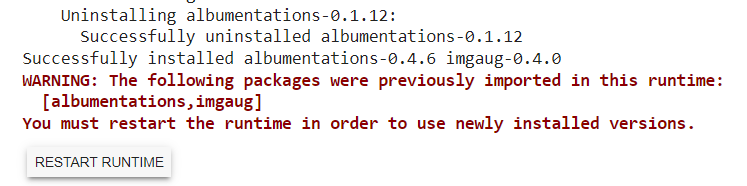


В нашем случае мы выполним перезагрузку автоматически, для этого после установки запустим следующий код:
```python
    import os
    os.kill(os.getpid(), 9)
```

Проведем проверку и доустановку необходимых библиотек для этого урока.

In [ ]:
import torch
TORCH_VERSION = ".".join(torch.__version__.split(".")[:2])
CUDA_VERSION  = torch.__version__.split("+")[-1]
print("torch: ", TORCH_VERSION, "; cuda: ", CUDA_VERSION)
#!pip install detectron2 -f https://dl.fbaipublicfiles.com/detectron2/wheels/{CUDA_VERSION}/{TORCH_VERSION}/index.html

!python -m pip install 'git+https://github.com/facebookresearch/detectron2.git'

import os
os.kill(os.getpid(), 9)

torch:  1.11 ; cuda:  cu113
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/facebookresearch/detectron2.git to /tmp/pip-req-build-6k9_h8sx
  Running command git clone -q https://github.com/facebookresearch/detectron2.git /tmp/pip-req-build-6k9_h8sx
     |████████████████████████████████| 50 kB 7.8 MB/s 
     |████████████████████████████████| 74 kB 4.0 MB/s 
     |████████████████████████████████| 151 kB 81.1 MB/s 
     |████████████████████████████████| 130 kB 81.0 MB/s 
     |████████████████████████████████| 38.1 MB 1.2 MB/s 
     |████████████████████████████████| 749 kB 61.6 MB/s 
     |████████████████████████████████| 843 kB 72.3 MB/s 
     |████████████████████████████████| 117 kB 82.6 MB/s 
     |████████████████████████████████| 77 kB 6.8 MB/s 
INFO: pip is looking at multiple versions of mypy-extensions to determine which version is compatible with other requirements. This could take a while.
INF

После установки и перезапуска среды проведем импортирование основных библиотек.

In [ ]:
import detectron2
import torch, torchvision

In [ ]:
import numpy as np
import os, json, cv2, random
from PIL import Image
import matplotlib.pyplot as plt

# from google.colab.patches import cv2_imshow

In [ ]:
from detectron2        import model_zoo
from detectron2.engine import DefaultPredictor, DefaultTrainer
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data             import MetadataCatalog, DatasetCatalog 
from detectron2.structures       import BoxMode
from detectron2.data.datasets    import register_coco_instances, load_coco_json
from detectron2.utils.logger     import setup_logger
from detectron2.utils.visualizer import ColorMode
from detectron2.evaluation       import COCOEvaluator, inference_on_dataset
from detectron2.data             import build_detection_test_loader

In [ ]:
def torch_stats(): 
    torch_version = ".".join(torch.__version__.split(".")[:2])
    print('torch version:',torch_version)
    
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    print('Using device:', device)
    dtype = torch.float32
    
    if device.type == 'cuda':
        cuda_version  = torch.__version__.split("+")[-1]
        print("cuda: ", cuda_version)
        
        torch.set_default_tensor_type(torch.cuda.FloatTensor)
        print('Cuda is available:',torch.cuda.is_available())

        n_devices = torch.cuda.device_count()
        print('number of devices: %d'%(n_devices))

        for cnt_device in range(n_devices):
            print(torch.cuda.get_device_name(cnt_device))
            print('Memory Usage:')
            print('Allocated:', round(torch.cuda.memory_allocated(cnt_device)/1024**3,1), 'GB')
            print('Cached:   ', round(torch.cuda.memory_reserved(cnt_device)/1024**3,1), 'GB')


    torch.set_default_dtype(dtype) # float32
    print('default data type:',dtype)
    
    num_workers=os.cpu_count() #torch.get_num_threads()
    print ('available number of workers:',num_workers)
    
    return device, dtype, num_workers
#-------------------------------
def torch_seed(seed = 42, deterministic = True):
    random.seed(seed) # random and transforms
    np.random.seed(seed) #numpy
    torch.manual_seed(seed) #cpu
    torch.cuda.manual_seed(seed) #gpu
    torch.backends.cudnn.deterministic=deterministic #cudnn    

In [ ]:
device, dtype, num_workers = torch_stats()
torch_seed(seed = 42, deterministic = True)

torch version: 1.11
Using device: cuda
cuda:  cu113
Cuda is available: True
number of devices: 1
Tesla T4
Memory Usage:
Allocated: 0.0 GB
Cached:    0.0 GB
default data type: torch.float32
available number of workers: 2


In [ ]:
import cv2
import random
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image

import os
import copy
import time

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torch.utils.data as data
from torch.utils.data import Dataset, DataLoader

import torchvision
from torchvision import transforms, datasets
import torchvision.transforms as T

from torchsummary import summary

from tqdm.notebook import tqdm, trange

import pandas as pd


# from albumentations.pytorch import ToTensorV2
# import albumentations as A

import shutil
from urllib.request import urlretrieve
from torchvision.datasets.utils import download_and_extract_archive



---






В рамках библиотеки `Detectron 2` реализованы:
* несколько вариантов ахритектуры `Fast-R-CNN` для решения задачи обнаружения объектов (`object detection`);   
* несколько вариантов ахритектуры `Mask-R-CNN` для решения задачи экземплярной сегментации объектов (`instance segmentation`);  
* несколько вариантов ахритектуры `Mask-R-CNN` для решения задачи поиска ключевых точек (`keypoint detection`); 
* несколько вариантов ахритектуры `Mask-R-CNN` для решения задачи паноптической (`panoptic segmentation`);
* варианты ахритектур более продвинутых архитектур, например, `Cascade-Mask-R-CNN`, несколько вариантов `RetinaNet` или варианты `Fast-R-CNN` c расширенной сверткой (`DC5`).

Все стандартные ахритектуры в текущей версии `Detectron 2` можно посмотреть [тут](https://github.com/facebookresearch/detectron2/blob/main/MODEL_ZOO.md).

Доступный набор ахритектур находятся в модуле `detectron2.model_zoo.model_zoo`. Список архитектур можно посмотреть при помощи метода `_ModelZooUrls()`.

Отметим, что помимо стандартных архитектур, в рамках проекта `Detectron 2` могут быть реализованы и сторонние архитектуры. Часть таких проектов можно найти в рамках официального репозитория в разделе [`projects`](https://github.com/facebookresearch/detectron2/tree/main/projects).

Все ахритектуры в рамках проекта `Detectron 2` предобучены на популярных наборах данных для решения соответствующих задач, для обнаружения объектов и их сегментации это набор данных [`Microsoft-COCO`](https://cocodataset.org/). Бибилотека позволяет использовать встроенные версии таких наборов данных. Ознакомится с ними можно, например, [тут](https://detectron2.readthedocs.io/en/latest/tutorials/builtin_datasets.html).

In [ ]:
from detectron2.model_zoo.model_zoo import _ModelZooUrls
mz = _ModelZooUrls()
print("\n".join(list(mz.CONFIG_PATH_TO_URL_SUFFIX.keys())))

COCO-Detection/faster_rcnn_R_50_C4_1x
COCO-Detection/faster_rcnn_R_50_DC5_1x
COCO-Detection/faster_rcnn_R_50_FPN_1x
COCO-Detection/faster_rcnn_R_50_C4_3x
COCO-Detection/faster_rcnn_R_50_DC5_3x
COCO-Detection/faster_rcnn_R_50_FPN_3x
COCO-Detection/faster_rcnn_R_101_C4_3x
COCO-Detection/faster_rcnn_R_101_DC5_3x
COCO-Detection/faster_rcnn_R_101_FPN_3x
COCO-Detection/faster_rcnn_X_101_32x8d_FPN_3x
COCO-Detection/retinanet_R_50_FPN_1x
COCO-Detection/retinanet_R_50_FPN_3x
COCO-Detection/retinanet_R_101_FPN_3x
COCO-Detection/rpn_R_50_C4_1x
COCO-Detection/rpn_R_50_FPN_1x
COCO-Detection/fast_rcnn_R_50_FPN_1x
COCO-InstanceSegmentation/mask_rcnn_R_50_C4_1x
COCO-InstanceSegmentation/mask_rcnn_R_50_DC5_1x
COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_1x
COCO-InstanceSegmentation/mask_rcnn_R_50_C4_3x
COCO-InstanceSegmentation/mask_rcnn_R_50_DC5_3x
COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x
COCO-InstanceSegmentation/mask_rcnn_R_101_C4_3x
COCO-InstanceSegmentation/mask_rcnn_R_101_DC5_3x
COCO-Insta

Проведем проверку основных возможностей `Detectron2`. Для этого загрузим фотографию из набора данных [`COCO`](https://cocodataset.org/#home), для которого в рамках репозитория можно найти ряд предобученных моделей.

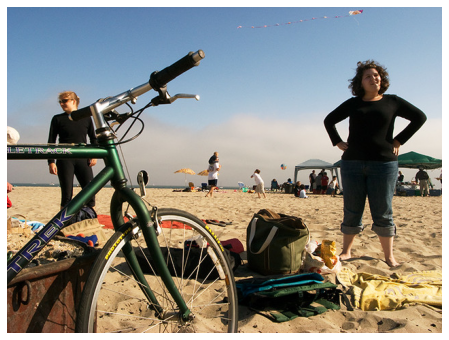

In [ ]:
!wget http://farm4.staticflickr.com/3190/2582737708_d323925200_z.jpg -q -O image.jpg

image = np.asarray(Image.open("./image.jpg"))
plt.figure(figsize=(18,6)); plt.imshow(image); plt.axis('off'); plt.show()

Для работы с моделями в `Detectron2` необходимо создать описание архитектур в виде т.н. конфигурационного файла. <br> Базовую конфигурацию можно получить при помощи функции `get_cfg()`.

Отметим, что полное описание конфигураций можно найти в официальной документации [тут](https://detectron2.readthedocs.io/en/latest/modules/config.html#yaml-config-references).

In [ ]:
cfg = get_cfg()

Загрузим одну кнофигурацию из готовых (представленных в  ```model_zoo```), например `faster rcnn` на основе энкодера архитектуры `resnet 50`.

In [ ]:
config = model_zoo.get_config_file("COCO-Detection/faster_rcnn_R_50_DC5_3x.yaml")
cfg.merge_from_file(config)

Также получим файл весовых параметров, соответствующих выбранной модели. Это можно сделать при помощи функции `get_checkpoint_url`. Как можно заметить по названию директорий файл предобуен на наборе данных `COCO`.

In [ ]:
model_weights  =  model_zoo.get_checkpoint_url("COCO-Detection/faster_rcnn_R_50_DC5_3x.yaml")

cfg.MODEL.WEIGHTS = model_weights

Также для модели установим значения следующих параметров.
 * Порог уверенности (`score`) по которому мы будем проводить процедуру `Non-Maximum Supression` (`NMS`, `SCORE_THRESH_TEST`). Напомним, что данная процедура позволяет проводить селекцию среди регионов кандидатов с высоким значенеием площадей пересечения.
 * Порог значений `IoU` по по которому мы будем проводить процедуру `NMS` (`NMS_THRESH_TEST`).
 




In [ ]:
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.7
cfg.MODEL.ROI_HEADS.NMS_THRESH_TEST = 0.5



In [ ]:
cfg.MODEL.ROI_HEADS

CfgNode({'NAME': 'StandardROIHeads', 'NUM_CLASSES': 80, 'IN_FEATURES': ['res5'], 'IOU_THRESHOLDS': [0.5], 'IOU_LABELS': [0, 1], 'BATCH_SIZE_PER_IMAGE': 512, 'POSITIVE_FRACTION': 0.25, 'SCORE_THRESH_TEST': 0.7, 'NMS_THRESH_TEST': 0.5, 'PROPOSAL_APPEND_GT': True})

Теперь создадим объект предсказатель на основе полученной конфигурации.

In [ ]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

predictor = DefaultPredictor(cfg)


model_final_68d202.pkl: 663MB [00:15, 43.8MB/s]                           


Получим результат предсказания загруженной модели для тестового изображения. Заметим, что предсказанный результат имеет тип словарь с одним полем `instances`. Поле может быть представленно в виде словаря, содержащего предсказанные рамки, значение уверенности для каждой из них `scores` и предсказанные классы `pred_classes`.


In [ ]:
outputs = predictor(image)

print(outputs.keys())
print(outputs['instances']._fields.keys())

dict_keys(['instances'])
dict_keys(['pred_boxes', 'scores', 'pred_classes'])


Проведем визуализацию предсказания. Для этого будем использовать объект класса `Visualizer`, предусмотренный для визуализации результатов в `Detectron2`.


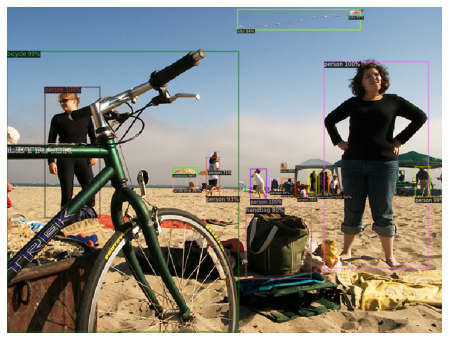

In [ ]:
v = Visualizer(image, 
               MetadataCatalog.get(cfg.DATASETS.TEST[0]), 
               scale=1.2)

out = v.draw_instance_predictions(outputs["instances"].to("cpu"))

plt.figure(figsize=(18,6)); plt.imshow(out.get_image()); plt.axis('off'); plt.show()

Теперь проверим как работает модель `Mask-R-CNN` для задачи `Instance Segmentation`. Процедура инициализации модели почти такая же, как и в предыдущем случае. Однако, результат работы модели в данном случае будет также содержать поле 'pred_masks', с масками (бинарными изображениями) для каждого из объектов.

model_final_9243eb.pkl: 144MB [00:04, 31.0MB/s]                           


dict_keys(['instances'])
dict_keys(['pred_boxes', 'scores', 'pred_classes', 'pred_masks'])


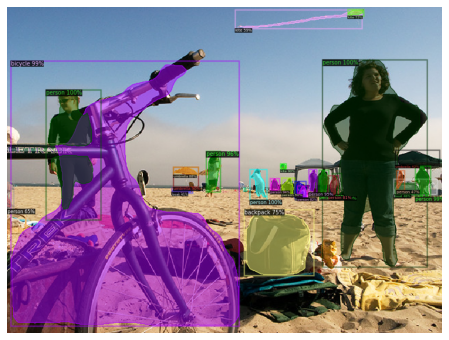

In [ ]:
MODEL = "COCO-InstanceSegmentation/mask_rcnn_R_50_C4_1x.yaml"

cfg          = get_cfg()
model_config  = model_zoo.get_config_file(MODEL)
model_weights =  model_zoo.get_checkpoint_url(MODEL)

cfg.merge_from_file(model_config)
cfg.MODEL.WEIGHTS = model_weights
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.4 
predictor = DefaultPredictor(cfg)
outputs   = predictor(image)

print(outputs.keys())
print(outputs['instances']._fields.keys())

v = Visualizer(image, 
               MetadataCatalog.get(cfg.DATASETS.TEST[0]), 
               scale=1.2)
out = v.draw_instance_predictions(outputs["instances"].to("cpu"))

plt.figure(figsize=(18,6)); plt.imshow(out.get_image()); plt.axis('off'); plt.show()

Аналогично предыдущим примерам проверим работоспособность для задачи `Key Point Segmentation`. В  этой задаче результаты будут содержать поля 'pred_keypoints' и 'pred_keypoint_heatmaps', которые описывают как сами положения ключевых точек, так и предворительные результаты их выделения.

model_final_a6e10b.pkl: 237MB [00:06, 37.7MB/s]                           
/usr/local/lib/python3.7/dist-packages/detectron2/structures/keypoints.py:224: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  y_int = (pos - x_int) // w


dict_keys(['instances'])
dict_keys(['pred_boxes', 'scores', 'pred_classes', 'pred_keypoints', 'pred_keypoint_heatmaps'])


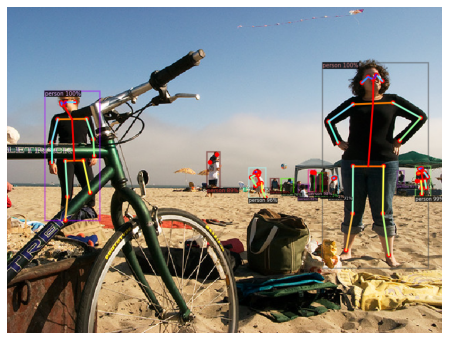

In [ ]:
MODEL = "COCO-Keypoints/keypoint_rcnn_R_50_FPN_3x.yaml"

# Inference with a keypoint detection model
cfg = get_cfg()   # get a fresh new config
cfg.merge_from_file(model_zoo.get_config_file(MODEL))
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.7  # set threshold for this model
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url(MODEL)
predictor = DefaultPredictor(cfg)
outputs = predictor(image)

print(outputs.keys())
print(outputs['instances']._fields.keys())

v = Visualizer(image, MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
out = v.draw_instance_predictions(outputs["instances"].to("cpu"))

plt.figure(figsize=(18,6)); plt.imshow(out.get_image()); plt.axis('off'); plt.show()

Посмотрим на работу в задаче  пан-оптическая сегментация (`Panoptic Segmentation`). В данном случае результат представляется в виде монохромного изобжраения со значениями яркости, соответствующеми номеру класса  и в виде набора информации о каждом найденном объекте.

model_final_cafdb1.pkl: 261MB [00:06, 38.8MB/s]                           


24 dict_keys(['id', 'isthing', 'score', 'category_id', 'instance_id']) torch.Size([480, 640]) tensor(24, dtype=torch.int32)


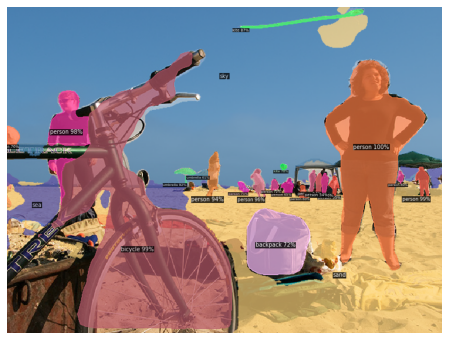

In [ ]:
MODEL = "COCO-PanopticSegmentation/panoptic_fpn_R_101_3x.yaml"

cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file(MODEL))
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url(MODEL)

predictor = DefaultPredictor(cfg)

panoptic_seg, segments_info = predictor(image)["panoptic_seg"]

print(len(segments_info), segments_info[0].keys(), panoptic_seg.shape,panoptic_seg.max())

v = Visualizer(image, MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)

out = v.draw_panoptic_seg_predictions(panoptic_seg.to("cpu"), segments_info)

plt.figure(figsize=(18,6)); plt.imshow(out.get_image()); plt.axis('off'); plt.show()

Для лучшего понимания мы также приведем свой вариант функции визуализации результатов работы модели `Instant Segmentation`.

In [ ]:
def plot_instant(image, mask, bbox):

    fig, axs = plt.subplots(1, 4, figsize = (18,6))
    image_ = np.copy(np.asarray(image)).astype(float)/image.max()
    
    # Ground Truth    
    axs[0].imshow(np.clip(image_,0,1), 'gray')
    axs[0].axis('off'); axs[0].set_title('Original Image')
    #----------------------------

    # Semantic Segmentaion
    mask_ = np.asarray(mask).sum(2)
    mask_[mask_>0]=255
    axs[1].imshow(mask_, 'gray')
    axs[1].axis('off'); axs[1].set_title('Semantic Segmentaion')  
    #----------------------------

    # Instance Segmentation
    out  = np.zeros((*mask.shape[:2],3),dtype=float)
    for i,mask_ in enumerate(mask.transpose((2,0,1))):
        ch_  = i%3
        mask_ = mask_*(np.random.rand()*0.5 + 0.5)        
        out[:,:,ch_]  = out[:,:,ch_]*0.9 + mask_[:,:]
   
    axs[2].imshow(np.clip(out/out.max(),0,1), 'gray')
    axs[2].axis('off'); axs[2].set_title('Instance Segmentation')  
    #----------------------------

    # Object Detection BBoxes
    bbox_ = np.asarray(bbox)
    axs[3].imshow(np.clip(image_,0,1), 'gray')
    for box_ in bbox_:
        bb = patches.Rectangle(xy     = (box_[0],box_[1]), 
                               width  = box_[2]-box_[0],
                               height = box_[3]-box_[1], 
                               linewidth=2, 
                               edgecolor="blue", 
                               facecolor="none")
        axs[3].add_patch(bb)  
    axs[3].axis('off'); axs[3].set_title('Object Detection')

    plt.tight_layout()
    plt.show()

In [ ]:
MODEL = "COCO-InstanceSegmentation/mask_rcnn_R_50_C4_1x.yaml"

cfg          = get_cfg()
model_config  = model_zoo.get_config_file(MODEL)
model_weights =  model_zoo.get_checkpoint_url(MODEL)

cfg.merge_from_file(model_config)
cfg.MODEL.WEIGHTS = model_weights

cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.4 


predictor = DefaultPredictor(cfg)
outputs   = predictor(image)

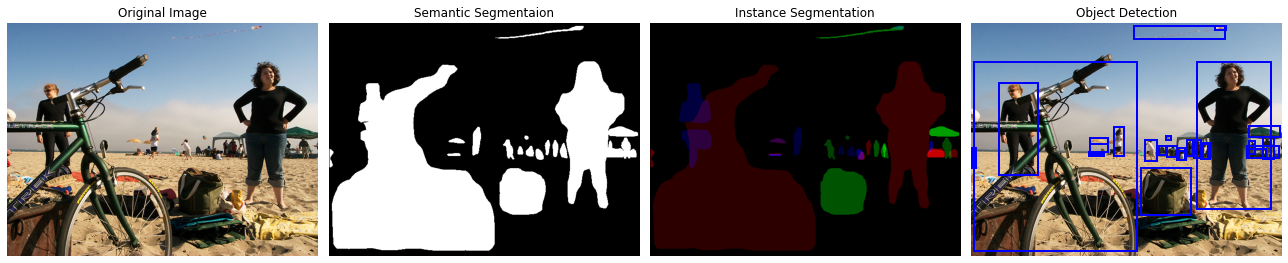

In [ ]:
fields = outputs['instances']._fields
masks = fields['pred_masks'].detach().data.cpu().numpy().transpose((1,2,0))
# print(type(masks), masks.shape)
boxes = fields['pred_boxes'].tensor.detach().data.cpu().numpy()
# print(type(boxes), boxes.shape)
plot_instant(image, masks, boxes)

**Тренировка ```MASK RCNN``` для задачи экземплярной сегментации** 






В этом примере мы рассмотрим набор данных с 1 классом [the balloon dataset](https://github.com/matterport/Mask_RCNN/tree/master/samples/balloon)  ("надувные шары"). Этот набор данных был изначально предложен для тестирования архитектуры `Mask-R-CNN`. Мы скачаем набор из официального репозитория `GitHub`.

In [ ]:
# download, decompress the data
url = "https://github.com/matterport/Mask_RCNN/releases/download/v2.1/balloon_dataset.zip"

root_directory = os.path.join(os.getcwd(),'')

archive_name = url.split('/')[-1]
dataset_directory = os.path.join(root_directory, archive_name)
# dataset_directory = os.path.splitext(dataset_directory)[0]
dataset_directory = os.path.join(root_directory, 'balloon')

download_and_extract_archive(url, root_directory)

  0%|          | 0/38741381 [00:00<?, ?it/s]

Extracting /content/balloon_dataset.zip to /content/


In [ ]:
# !wget https://github.com/matterport/Mask_RCNN/releases/download/v2.1/balloon_dataset.zip
# !unzip balloon_dataset.zip > /dev/null

Проверим содержание набора. Путь к набору должен содержать две директории: `val` и `train`.

In [ ]:
content = os.listdir(dataset_directory)
print(content)

['train', 'val']


Каждая директория содержит набор изображений и специальный файл разметки в формате `json`. Такая структура датасета типична для задач обнаружения объектов и их сегментации. Ниже записана функция `get_balloon_anno`, которая преобразует входную аннотацию в т.н. формат `COCO`. Этот формат был изначально предложен компанией Microsoft для решения аналогичных задач. Набор данных `COCO` можно найти по официальной [ссылке](https://cocodataset.org/#home). Для работы с разметкой набора данных мы создадим лист словарей, включающих такие поля, как:
* `file_name` - название изображения;
* `image_id`  - номер изображения, начиная с 1;
* `height`, `width` - размеры изображения;
* `annotations` - аннотация к изображению, которая представляет собой лист словарей для каждого выделенного объекта на изображении:
    * `bbox` - размеры ограничичивающей рамки для изображения;
    * `bbox_mode` - тип описания рамки, в нашем случае мы используем формат `x0,y0,W,H` (`XYWH_ABS`), то есть по координатам левого верхнего угла, ширины и высоты, для ознокомления с режимами описания рамок в Detectron2 можно воспользоваться [этой ссылкой](https://github.com/facebookresearch/detectron2/blob/main/detectron2/structures/boxes.py);
    * `segmentation` - координаты границ сегментированного объекта на изображении (то есть координаты границ соответствующего полигона);
    * `category_id` - класс объекта.
Отметим, что данный формат далеко не полный для формата `COCO`. C описанием полного набора данных можно ознакомится на официальной странице [тут](https://cocodataset.org/#format-data).  
<!-- Также отметим, что в оригинальном формате  `COCO` используется представление рамки в виде `XYWH`, то есть координаты левого угла, ширина и высота объекта. Однако, можно будет заметиь, что такое представление будет неудобным при оценке результатов работы сети. -->

In [ ]:
from detectron2.structures import BoxMode

def balloon2COCO(img_dir):
    json_file = os.path.join(img_dir, "via_region_data.json")
    with open(json_file) as f:
        imgs_anns = json.load(f)

    dataset_dicts = []
    for idx, v in enumerate(imgs_anns.values()):
        record = {}
        
        filename = os.path.join(img_dir, v["filename"])
        height, width = np.asarray(Image.open(filename)).shape[:2]
        
        record["file_name"] = filename
        record["image_id"] = idx
        record["height"] = height
        record["width"] = width
      
        annos = v["regions"]
        objs = []
        for _, anno in annos.items():
            assert not anno["region_attributes"]
            anno = anno["shape_attributes"]
            px = anno["all_points_x"]
            py = anno["all_points_y"]
            poly = [(x, y) for x, y in zip(px, py)]
            poly = [p for x in poly for p in x]

            obj = {
                "bbox": [np.min(px), np.min(py), np.max(px)-np.min(px), np.max(py)-np.min(py)],
                "bbox_mode": BoxMode.XYWH_ABS,
                "segmentation": [poly],
                "category_id": 0,
            }
            objs.append(obj)
        record["annotations"] = objs
        dataset_dicts.append(record)
    return dataset_dicts

In [ ]:
val_dir   = os.path.join(dataset_directory, 'val')
train_dir = os.path.join(dataset_directory, 'train')

Теперь надо [зарегистировать датасет](https://detectron2.readthedocs.io/tutorials/datasets.html) - то есть преобразовать его к внутренниму формату детектрона. Для этого используем следующую функцию.

*Следуе отметить, что для датасета формата ```COCO``` достаточно следующего кода для регистрации набора данных*

```python
from detectron2.data.datasets import register_coco_instances
register_coco_instances("my_dataset_train", {}, "json_annotation_train.json","path/to/image/dir")
register_coco_instances("my_dataset_val", {}, "json_annotation_val.json", "path/to/image/dir")
```
Однако, мы выполним более полную процедуру, это будет полезно при последующем использовании библиотеки `Detectron2`.

Для двух каталогов `train` и `val` проведем регистрацию данных и методанных - их разметки. Отметим также, что лист регистрации наборов данных `DatasetCatalog` представляет собой не переписываемый список. Это значит, что если набор данных был однажды зарегестрирован (под одним и тем же именем), то перерегистрация на прямую не удасться. Поэтому, если необходимо перезаписать набор данных в `DatasetCatalog`, например, для другой конфигурации, то необходимо сначала удалить соответствующий набор данных  при помощи метода `pop`.

<!-- !*Следует отметить, что в данном слаучае у нас нет тестового датасета - поэтому мы будем использовать валидационный датасет как тестовый, а валидировать будем на части тренировочного датасета(то есть он будет разбит на две части в рамках процедуры обучения!).* -->

In [ ]:
try:
    DatasetCatalog.pop("balloon_train")
except:
    pass

try:  
    DatasetCatalog.pop("balloon_val")
except:
    pass  

In [ ]:

try:  
    DatasetCatalog.register("balloon_train", lambda : balloon2COCO("balloon/train"))
except:
    print('Probably data %s have been already registred')

try:  
    DatasetCatalog.register("balloon_val", lambda : balloon2COCO("balloon/val"))
except:
    print('Probably data %s have been already registred')    

MetadataCatalog.get("balloon_train").set(thing_classes=["balloon"])
MetadataCatalog.get("balloon_val").set(thing_classes=["balloon"])

Metadata(name='balloon_val', thing_classes=['balloon'])

Теперь проверим что все прошло удачно - для этого загрузим одно случайное изображение и маску для него из тренировочного каталога.



Для этого получим данные и методанные для тренировочного датасета.

In [ ]:
balloon_metadata = MetadataCatalog.get("balloon_train")
dataset_dicts    = balloon2COCO("balloon/train")

In [ ]:
balloon_metadata.as_dict()

{'name': 'balloon_train', 'thing_classes': ['balloon']}

In [ ]:
print('N Train',len(dataset_dicts))
print(dataset_dicts[0].keys())

N Train 61
dict_keys(['file_name', 'image_id', 'height', 'width', 'annotations'])


Теперь посмотрим на 2 изображения из набора данных, чтобы убедиться, что регистрация набора прошла успешно.

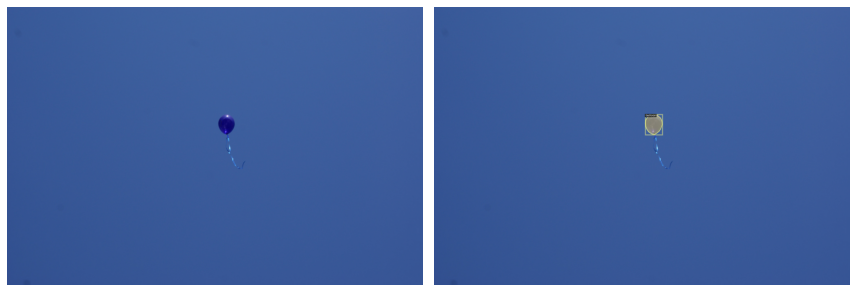

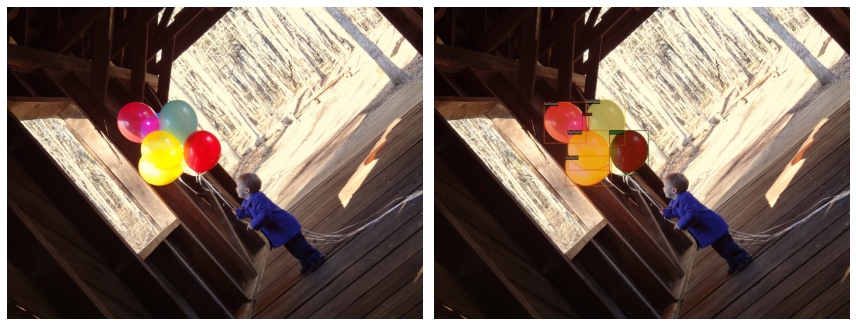

In [ ]:
for d in random.sample(dataset_dicts, 2):    
    img   = Image.open(d["file_name"])
    _,axs = plt.subplots(1,2,figsize=(12,8))    
    axs[0].imshow(img); axs[0].axis('off')    
    visualizer = Visualizer(img, metadata=balloon_metadata, scale=1)    
    out = visualizer.draw_dataset_dict(d)
    axs[1].imshow(out.get_image()); axs[1].axis('off')
    plt.tight_layout();plt.show()

Также попробуем визуализировать набор данных самостоятельно. 
Для этого создадим ряд вспомогательных функций, в том числе

* `get_masks` - функция, преобразующая аннотацию в т.н. `ground truth` маску для каждого изображения; 
    * `_ann2mask` - функция, преобразующая аннотацию в т.н. `ground truth` маску для каждого объекта на изображении; 
* `get_bboxes` - функция выводящяя рамку для каждого изображения в формате `x0,y0,x1,y1` (`XYXY_ABS`).
* `plot_allformats` - функция для отрисовки изображения и всех форматов его разметки.

Отметим, что в данном случае мы воспользуемся библиотекой `pycocotools`, которая создана для поддержки формата `COCO`. С полным функционалом библиотеки можно ознакомится в рамках официального репозитория [тут](https://github.com/cocodataset/cocoapi/tree/master/PythonAPI/pycocotools).

In [ ]:
from pycocotools import mask as cocoutils

def get_masks(image_anno):
    h = image_anno['height'] 
    w = image_anno['width' ]
    mask_anns = image_anno['annotations']
    mask = np.zeros((h,w, len(mask_anns)))
    for i,ann in enumerate(mask_anns):
        mask[:,:,i] = _ann2mask(ann,h,w)
    return mask

def _ann2mask(ann, h,w):
    segm = ann['segmentation']
    rles = cocoutils.frPyObjects(segm, h, w)
    rle  = cocoutils.merge(rles)
    instant_mask = cocoutils.decode(rle)  
    return instant_mask

def get_bboxes(image_anno):
    bboxes = np.zeros((len(image_anno['annotations']),4),dtype=int)#x0,y0,w,h

    for i,ann in enumerate(image_anno['annotations']):
        bboxes[i] = ann['bbox']
    bboxes[:,2] = bboxes[:,0]+bboxes[:,2] #x-max
    bboxes[:,3] = bboxes[:,1]+bboxes[:,3] #y-max
    return bboxes 

balloon/train/34020010494_e5cb88e1c4_k.jpg


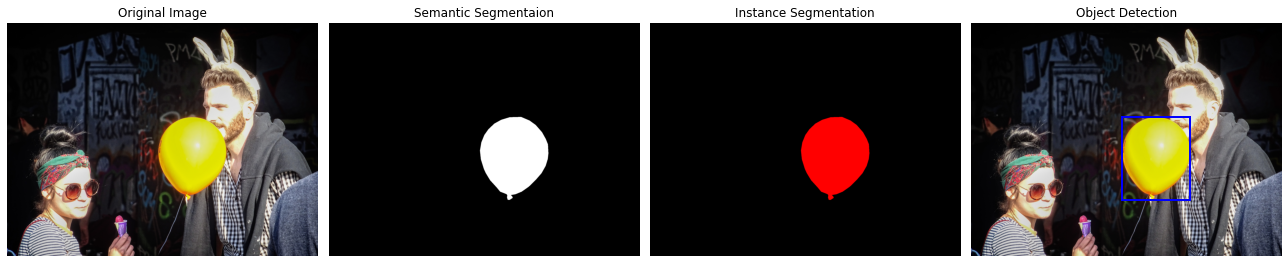

In [ ]:

d = dataset_dicts[0]
print(d['file_name'])

image = np.asarray(Image.open(d["file_name"]))


masks = get_masks(d)
boxes = get_bboxes(d)

plot_instant(image, masks, boxes)

После того, как набор данных успешно загружен можно провести тренеровку нейронной сети. В нашем случае мы будем проводить дообучение модели для задачи  `instace segmentataion`  использованной ранее модели, обученной на датасете ```COCO``` .




В самом простом случае обучение может быть проведено при помощи объекта класса `DefaultTrainer`. Однако, мы создадим свой класс тренировки с использованием аугментации `CustomTrainer`. Фреймворк `Detectron2` предоставляет свой функционал аугментации, который может быть импортирован из модуля `detectron2.data.transforms`. Для применения аугментации к данным мы запишем функцию `custom_mapper`.

In [ ]:
from detectron2.engine import DefaultTrainer

In [ ]:
from detectron2.data import build_detection_test_loader, build_detection_train_loader

class CustomTrainer(DefaultTrainer):
    @classmethod
    def build_train_loader(cls, cfg):
        return build_detection_train_loader(cfg, mapper=custom_mapper)

In [ ]:
from detectron2.data import detection_utils as utils
import detectron2.data.transforms as T
import copy
import torch

def custom_mapper(dataset_dict):
    dataset_dict = copy.deepcopy(dataset_dict)  # it will be modified by code below
    
    image = utils.read_image(dataset_dict["file_name"], format="BGR")
    
    transform_list = [
                        T.Resize((800,600)),
                        T.RandomBrightness(0.8, 1.8),
                        T.RandomContrast(0.6, 1.3),
                        T.RandomSaturation(0.8, 1.4),
                        T.RandomRotation(angle=[90, 90]),
                        T.RandomLighting(0.7),
                        T.RandomFlip(prob=0.4, horizontal=False, vertical=True),
                    ]
    
    image, transforms = T.apply_transform_gens(transform_list, image)

    dataset_dict["image"] = torch.as_tensor(image.transpose(2, 0, 1).astype("float32"))

    annos = [
        utils.transform_instance_annotations(obj, transforms, image.shape[:2])
        for obj in dataset_dict.pop("annotations")
        if obj.get("iscrowd", 0) == 0
    ]

    instances = utils.annotations_to_instances(annos, image.shape[:2])
    
    dataset_dict["instances"] = utils.filter_empty_instances(instances)
    
    return dataset_dict



Также необходимо провести конфигурирование модели.
<br>
 Мы будем использовать следующую конфигурацию. 
* Конфигурация на основе `mask_rcnn_R_50_FPN_3x`;
* датасет ```balloon_train```;
* число итераций `300` (то есть 300 батчей);
* батч `2` изображения;
* число классов `1`.



In [ ]:
BATCH = 2

cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))
cfg.DATASETS.TRAIN = ("balloon_train",)
cfg.DATASETS.TEST = ()
cfg.DATALOADER.NUM_WORKERS = 2
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")  # Let training initialize from model zoo
cfg.SOLVER.IMS_PER_BATCH = BATCH
cfg.SOLVER.BASE_LR = 0.00025  # pick a good LR
cfg.SOLVER.MAX_ITER = 300    # 300 iterations seems good enough for this toy dataset; you will need to train longer for a practical dataset
cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 128   # faster, and good enough for this toy dataset (default: 512)
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 1  # only has one class (ballon). (see https://detectron2.readthedocs.io/tutorials/datasets.html#update-the-config-for-new-datasets)

Теперь запустим саму процедуру тренеровки. Для сохранения результатов создадим директорию `./output` (`cfg.OUTPUT_DIR`). Режим тренеровки сделаем `сначала`, то есть установим `trainer.resume_or_load(resume=False)`. Если вам будет необходимо продолжить тренеровать модель, то аргмумент `resume` следует установить `True`. 

In [ ]:
import torch.multiprocessing as mp
mp.set_start_method('spawn', force=True)

os.makedirs(cfg.OUTPUT_DIR, exist_ok=True);
trainer = CustomTrainer(cfg)#DefaultTrainer(cfg);

trainer.resume_or_load(resume=False)

[05/24 11:32:42 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res

model_final_f10217.pkl: 178MB [00:11, 14.9MB/s]                           
Skip loading parameter 'roi_heads.box_predictor.cls_score.weight' to the model due to incompatible shapes: (81, 1024) in the checkpoint but (2, 1024) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.cls_score.bias' to the model due to incompatible shapes: (81,) in the checkpoint but (2,) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.bbox_pred.weight' to the model due to incompatible shapes: (320, 1024) in the checkpoint but (4, 1024) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.bbox_pred.bias' to the model due to incompatible shapes: (320,) in the checkpoint but (4,) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.mask_head.predictor.weight' to the model due to i

Теперь запустим саму процедуру тренеровки.
 Отмеимт

In [ ]:
trainer.train()

[05/24 11:33:01 d2.engine.train_loop]: Starting training from iteration 0
[05/24 11:33:14 d2.utils.events]:  eta: 0:02:07  iter: 19  total_loss: 2.096  loss_cls: 0.6339  loss_box_reg: 0.6881  loss_mask: 0.6744  loss_rpn_cls: 0.05777  loss_rpn_loc: 0.0136  time: 0.4678  data_time: 0.1549  lr: 1.6068e-05  max_mem: 2487M
[05/24 11:33:23 d2.utils.events]:  eta: 0:02:02  iter: 39  total_loss: 1.83  loss_cls: 0.527  loss_box_reg: 0.7036  loss_mask: 0.6013  loss_rpn_cls: 0.02702  loss_rpn_loc: 0.007314  time: 0.4709  data_time: 0.0149  lr: 3.2718e-05  max_mem: 2487M
[05/24 11:33:33 d2.utils.events]:  eta: 0:01:53  iter: 59  total_loss: 1.647  loss_cls: 0.419  loss_box_reg: 0.6003  loss_mask: 0.5094  loss_rpn_cls: 0.04573  loss_rpn_loc: 0.02179  time: 0.4703  data_time: 0.0106  lr: 4.9367e-05  max_mem: 2487M
[05/24 11:33:42 d2.utils.events]:  eta: 0:01:44  iter: 79  total_loss: 1.516  loss_cls: 0.3347  loss_box_reg: 0.6658  loss_mask: 0.3874  loss_rpn_cls: 0.02084  loss_rpn_loc: 0.01288  time:

В случае необходимости посмотреть результаты тренировки это возможно сделать при помощи сервиса `tensorboard`. В случае необходимости разкомментируйте следующих код.

In [ ]:
# Look at training curves in tensorboard:
# %load_ext tensorboard
# %tensorboard --logdir output

Оттмеим, что в результате обучения в выходной директории должны быть созданы файл с весовыми параметрами послдений эпохи обучения `model_final.pth` и файл с результатами обучения на каждой эпохе `metrics.json`.

**Оценка результатов обучения нейронной сети**<br><br>
Проведем оценку результатов обучения на валидационном наборе данных.

Для этого создадим объект - предсказатель, в котором используем результаты только что обученной модели.

$^*$ Конфигурация предсказателя должна быть основана на конфигурации для тренировки. Но в ней нужно добавить путь к обученным весам и выставить порог принятия решения об объекте (вероятность объекта не менее 70%).

In [ ]:
cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_final.pth")
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.7   # set the testing threshold for this model
cfg.DATASETS.TEST = ("balloon_val", )
predictor = DefaultPredictor(cfg)

[05/24 11:35:53 d2.checkpoint.c2_model_loading]: Following weights matched with model:
| Names in Model                                  | Names in Checkpoint                                                                                  | Shapes                                          |
|:------------------------------------------------|:-----------------------------------------------------------------------------------------------------|:------------------------------------------------|
| backbone.bottom_up.res2.0.conv1.*               | backbone.bottom_up.res2.0.conv1.{norm.bias,norm.running_mean,norm.running_var,norm.weight,weight}    | (64,) (64,) (64,) (64,) (64,64,1,1)             |
| backbone.bottom_up.res2.0.conv2.*               | backbone.bottom_up.res2.0.conv2.{norm.bias,norm.running_mean,norm.running_var,norm.weight,weight}    | (64,) (64,) (64,) (64,) (64,64,3,3)             |
| backbone.bottom_up.res2.0.conv3.*               | backbone.bottom_up.res2.0.conv3.{norm.bia

Попробуем визуализировать результаты для валидационного набора данных.

In [ ]:
from detectron2.utils.visualizer import ColorMode
from detectron2.evaluation import COCOEvaluator, inference_on_dataset
from detectron2.data import build_detection_test_loader

Возьмем валидационный датасет

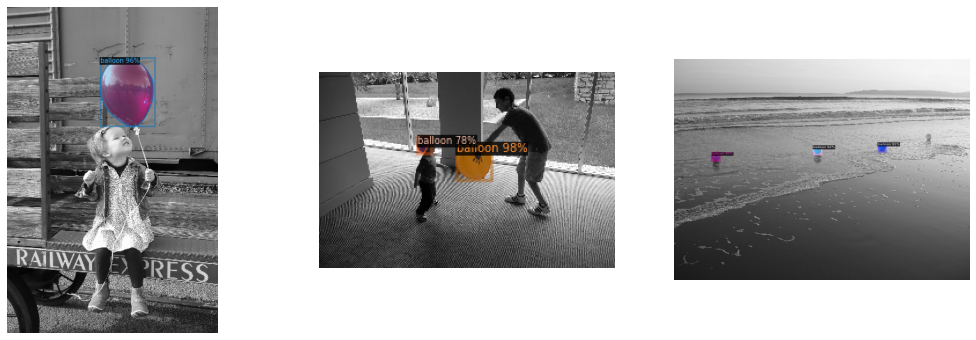

In [ ]:
dataset_dicts = balloon2COCO("balloon/val")

_, axs = plt.subplots(1,3,figsize=(18,6))

for i,d in enumerate(random.sample(dataset_dicts, 3)):    
    im = np.asarray(Image.open(d["file_name"]))
    outputs = predictor(im)  # format is documented at https://detectron2.readthedocs.io/tutorials/models.html#model-output-format
    v = Visualizer(im[:, :, ::-1],
                   metadata=balloon_metadata, 
                   scale=0.25, 
                   instance_mode=ColorMode.IMAGE_BW   # remove the colors of unsegmented pixels. This option is only available for segmentation models
    )
    out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
    axs[i].imshow(out.get_image()); axs[i].axis('off'); 
plt.show()

Проведем количественную оценку точности результатов обучения сети. Для этого используем метрику средняя точность (average precision, AP), а также оценим среднюю полноту результатов обучения (average recall, AR).

Создадим объект - оценка точности

In [ ]:
evaluator  = COCOEvaluator(dataset_name = "balloon_val", 
                           tasks        = ("bbox", "segm"), 
                           distributed  = False, 
                           output_dir   = "./output/")

[05/24 11:36:07 d2.evaluation.coco_evaluation]: Trying to convert 'balloon_val' to COCO format ...
[05/24 11:36:07 d2.data.datasets.coco]: Converting annotations of dataset 'balloon_val' to COCO format ...)
[05/24 11:36:07 d2.data.datasets.coco]: Converting dataset dicts into COCO format
[05/24 11:36:07 d2.data.datasets.coco]: Conversion finished, #images: 13, #annotations: 50
[05/24 11:36:07 d2.data.datasets.coco]: Caching COCO format annotations at './output/balloon_val_coco_format.json' ...


Создадим объект загрузки датасета

In [ ]:
val_loader = build_detection_test_loader(cfg, "balloon_val")

[05/24 11:36:10 d2.data.build]: Distribution of instances among all 1 categories:
|  category  | #instances   |
|:----------:|:-------------|
|  balloon   | 50           |
|            |              |
[05/24 11:36:10 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in inference: [ResizeShortestEdge(short_edge_length=(800, 800), max_size=1333, sample_style='choice')]
[05/24 11:36:10 d2.data.common]: Serializing 13 elements to byte tensors and concatenating them all ...
[05/24 11:36:10 d2.data.common]: Serialized dataset takes 0.02 MiB


Отметим, что в случае задач обнраружения и/или сегментации объектов на изображениях как правило используется специфичекая метрика оценки качества модели. Такая метника - это средняя точность `average precision`. Для случая бинарной классификации метрика рассчитвается следующим образом.
* Входные данные:
    * полученные координаты габаритной рамки (`bbox`) регионов кандидатов;
    * полученнные величины уверенности `score` для каждого региона;
    * заданные координаты габаритных рамок (`bbox`) для целевых объектов;
    * порог пересечения, по которому обираются регионы.
* Выходные данные: средняя точность.
* Ход алгоритма:
    * создаются пустые массивы правильных ответов модели (`tp`) и неправильных (`fp`).
    * значеия уверенности  `score` и соответствующие регионы кандидаты сортируются в порядке убывания ( от большего к меньшему);
    * для каждого региона-кандидата в заданном порядке:
        * вычисляется пересечение площадей (`IoU`) региона-кандидата со всем заданными габаритными рамками;
        * производится выбор наилучшего значения пересечения плодащей и соответствующего целевого объекта;
        * если полученное значение `IoU` больше заданного порога и для выбранного целевого объекта небыло назначено региона-кондидата, то целевому объекту присваивается регион кандидат;
            * если предыдущее условие выполнено, то для региона `tp` = 1 (правильная классификация);
            * если предыдущее не выполнено, то для региона `fp` = 1  (ложное срабатывание);
    * вычисляется кумулитивная (набегающая) сумма  `tp` и `fp` (`tpr` и `fpr`).
    * вычисляется массив `precision` как $\mathrm{tpr}/ (\mathrm{tpr} + \mathrm{fpr})$;
    * вычисляется массив `recall` как $\mathrm{tpr} /\text{all samples}$;
    * вычисляется `average_precision` как 
$\text{AP} = \sum(\text{precision})d(\text{recall})$ 
    (интеграл) в координатах (`recall;precision`)
    * выход:  значение `average_precision`; среднее значение может быть вычислено как по одному изображени, так и по всему батчу;
    <ul> 
    часто значение <code>average_precision</code> вычисляет по результатам кусочно-линейно аппроксимации, по 11 отрезкам вместо всего диапазона значений (<code>recall;precision</code>).</ul>

Отметим, что данный алгоритм соответствует методике, например, описанной [тут](https://github.com/aladdinpersson/Machine-Learning-Collection/blob/master/ML/Pytorch/object_detection/metrics/mean_avg_precision.py).

В библеотеке `Detectron2` описанная метрика `AP` несколькими способами: 
* в зависимости от значение порогового пересечения площадей объектов (`IoU`);
* как среднее по диапазону пороговых значений `IoU`: 0.5:0.95 с шагом 0.05;
* для объектов с разной площадью в пикселях (`small, medium, large`);
* аналогично описанному выше расчитывается `average recall` (`AR`), $\text{AR} = \sum(\text{recall})d(\text{precision})$;
* значения `AR` и `AP` расчитываются отдельно для каждого типа задач (в нашем случае, для `instat segmentation` и для `object detection`.

In [ ]:
print(inference_on_dataset(trainer.model, val_loader, evaluator))

# another equivalent way to evaluate the model is to use `trainer.test`

[05/24 11:36:14 d2.evaluation.evaluator]: Start inference on 13 batches
[05/24 11:36:21 d2.evaluation.evaluator]: Inference done 11/13. Dataloading: 0.0019 s/iter. Inference: 0.1350 s/iter. Eval: 0.0555 s/iter. Total: 0.1924 s/iter. ETA=0:00:00
[05/24 11:36:21 d2.evaluation.evaluator]: Total inference time: 0:00:01.742127 (0.217766 s / iter per device, on 1 devices)
[05/24 11:36:21 d2.evaluation.evaluator]: Total inference pure compute time: 0:00:01 (0.131373 s / iter per device, on 1 devices)
[05/24 11:36:21 d2.evaluation.coco_evaluation]: Preparing results for COCO format ...
[05/24 11:36:21 d2.evaluation.coco_evaluation]: Saving results to ./output/coco_instances_results.json
[05/24 11:36:21 d2.evaluation.coco_evaluation]: Evaluating predictions with unofficial COCO API...
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
[05/24 11:36:21 d2.evaluation.fast_eval_api]: Evaluate annotation type *bbox*
[05/24 11:36:21 d2.evaluation.fast_eval_api]: COCOeval

В конце урока упомянем, что обученные в `Detectron2` модели могут быть использованы в общих проектах `PyTorch`. Для этого модели могут быть загружены, например, так, как это показано ниже. Для загрузки модели требуется ее конфигурация и файл параметров. Конфигурация может быть сохранена при метода `dump()`, например так, как это показано ниже.

In [ ]:
path2cfg = os.path.join(cfg.OUTPUT_DIR,'config.yml')
with open(path2cfg, 'w+') as f:
    f.write(cfg.dump())

Файл конфигурации может быть загружен при помощи функции `merge_from_file()`.

In [ ]:
from detectron2.config import get_cfg

cfg = get_cfg()
cfg.merge_from_file(path2cfg)

Теперь модель может загружен из конфигурационного файла при помощи функции `build_model()`, весовые параметры для модели могут быть загружены при помощи класса `DetectionCheckpointer()`. Пример показан ниже.

In [ ]:
from detectron2.modeling import build_model
from detectron2.checkpoint import DetectionCheckpointer

model = build_model(cfg)
DetectionCheckpointer(model).load("./output/model_final.pth");

[05/24 11:37:17 d2.checkpoint.c2_model_loading]: Following weights matched with model:
| Names in Model                                  | Names in Checkpoint                                                                                  | Shapes                                          |
|:------------------------------------------------|:-----------------------------------------------------------------------------------------------------|:------------------------------------------------|
| backbone.bottom_up.res2.0.conv1.*               | backbone.bottom_up.res2.0.conv1.{norm.bias,norm.running_mean,norm.running_var,norm.weight,weight}    | (64,) (64,) (64,) (64,) (64,64,1,1)             |
| backbone.bottom_up.res2.0.conv2.*               | backbone.bottom_up.res2.0.conv2.{norm.bias,norm.running_mean,norm.running_var,norm.weight,weight}    | (64,) (64,) (64,) (64,) (64,64,3,3)             |
| backbone.bottom_up.res2.0.conv3.*               | backbone.bottom_up.res2.0.conv3.{norm.bia

Проверим работоспособность загруженной модели. Для этого создадим входные данные модели. В данном случае модель требует на входе формат вида `List[Dict[str, torch.Tensor]]`, где `str` должен быть полем `"image"`, а `tensor` - изображением в привычном формате `PyTorch (CxHxW)`. 

Отметим, что в случае использования модели в режиме обучения (`train()`) каждый словарь также дложен иметь поле `instances` c описанием разметки. Также опционально допускается поле `proposal`, для независимо полученнных оценок параметров детектируемых объектов. Однако, в нашем случае мы тестируем модель (режим `eval()`), поэтому этих полей не требуется. Подбробей про использование моделей можно прочитать в соответствующем разделе докуметации [тут](https://detectron2.readthedocs.io/en/latest/tutorials/models.html).

Создадим батч из 3 случайных изображений валидационного набора данных.

In [ ]:
n_samples = 3
dataset_dicts = balloon2COCO("balloon/val")

imgs = []
for d in random.sample(dataset_dicts, n_samples):    
    im = np.asarray(Image.open(d["file_name"]))
    im = torch.as_tensor(im.transpose((2,0,1))).to(device)
    imgs += [{"image":im}]




/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: The given NumPy array is not writable, and PyTorch does not support non-writable tensors. This means writing to this tensor will result in undefined behavior. You may want to copy the array to protect its data or make it writable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ../torch/csrc/utils/tensor_numpy.cpp:178.)
  import sys


Теперь проведем оценку.

In [ ]:
model.eval()
with torch.no_grad():
    outs = model.forward(imgs)

print(len(outs))

3


Теперь проведем визуализацию результатов. Выходные результаты представляют собой список словарей с полем `instances`, устроенных аналогично тому, как это было показано ранее.

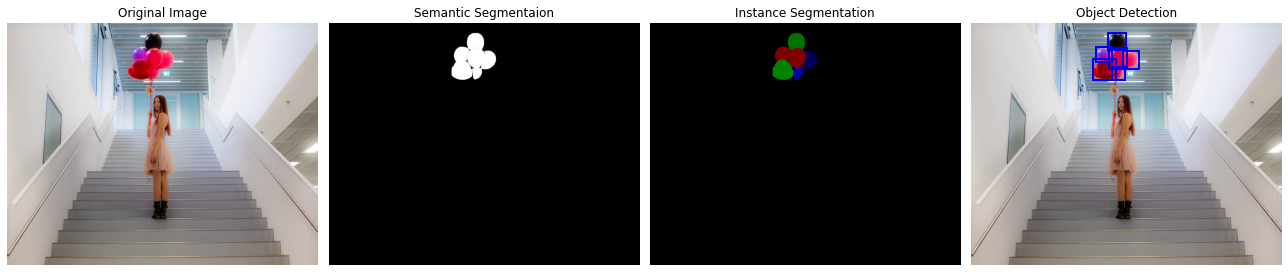

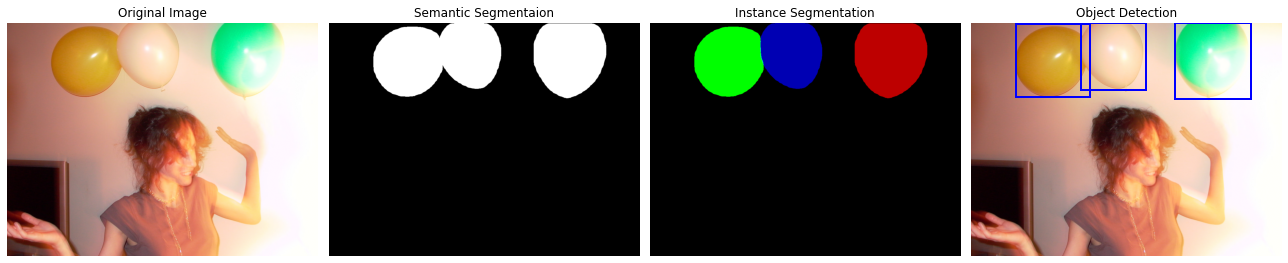

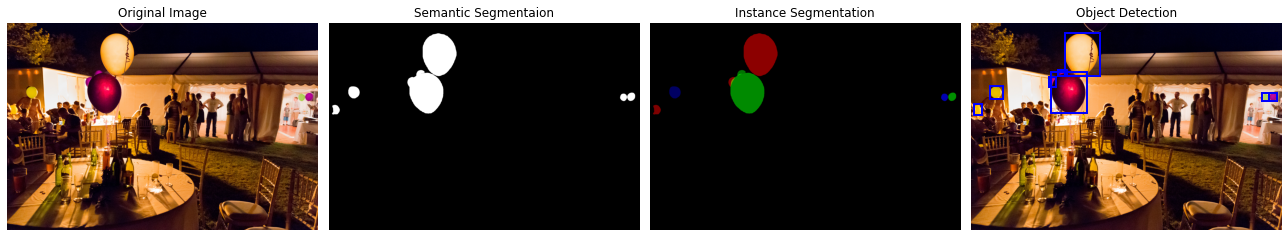

In [ ]:
for im,target in zip(imgs,outs ):   
    image = im['image'].data.cpu().numpy().transpose((1,2,0))
    fields = target['instances']._fields
    masks = fields['pred_masks'].detach().data.cpu().numpy().transpose((1,2,0))

    boxes = fields['pred_boxes'].tensor.detach().data.cpu().numpy()

    plot_instant(image, masks, boxes)

Также отметим, для модели, созданной в рамках `Detectron2` может быть дополнительно проведена тренеровка в рамках `PyTroch`. В этом случае каждый батч можнт быть сформерован, например при помощи следующего примера:
``` python
batch_size = 4
dataset_dicts = balloon2COCO("balloon/train")

instants = []
for i,d in enumerate(random.sample(dataset_dicts, batch_size)):    
    d = custom_mapper(d)
    instants += [{"image":d['image'],
                  'instances':d['instances'] }]
```
Выход модели в режиме тренировка - словарь значений функции потерь, то есть сами значения вычисляются внутри модели. <br>
При этом для обучения модели, полученной из `Detectron2` необходимо использовать объект класса `EventStorage()`, например так, как это показано в примере:
```python
from detectron2.utils.events import EventStorage

optimizer = ...

model.train()
with EventStorage() as storage:
  instants ... dataloader(...):
    loss_dict =  model.forward(instants )
    loss = sum(loss for loss in loss_dict.values())
    loss.backward()
    optimizer.step()
```

**Упражнение 1**
1. Попробуйте повычить точность решения, используя `model_zoo`;
2. Попробуйте преобразовать показанные примеры в решение проблемы `object detection` для набора данных Balloon.
2. Попробуйте обучить модель для задачи обнаружения окон и зданий по ссылке
https://github.com/InformationSystemsFreiburg/image_segmentation_japan/raw/master/buildings.zip
<!-- as hint you may use this link https://rosenfelder.ai/Instance_Image_Segmentation_for_Window_and_Building_Detection_with_detectron2/ -->
*Примечание* набор имеет формат COCO

<!-- 
3. Try to build an instance segmentation model for the  blood cells dataset, that you may find here: https://public.roboflow.com/object-detection/bccd
<!-- as hint you may use this link https://blog.roboflow.com/how-to-train-detectron2/ 
*Note* you will need to register for download data, please download data in the COCO format
https://colab.research.google.com/drive/1-TNOcPm3Jr3fOJG8rnGT9gh60mHUsvaW#scrollTo=QvbWgc7HhfWi -->

**Упражнение 2**
1. Изучитие следующий код загрузки набора данных [`PennFudanPed`](https://www.cis.upenn.edu/~jshi/ped_html/).
2. Попробуйте обучить одну из моделей `Detectron2` для данного набора данных.

*Примечание* Набор данных  PennFudanPed используется в официальном туториал `PyTorch` по обучению Mask-R-CNN в рамках базового фреймворка [тут](https://pytorch.org/tutorials/intermediate/torchvision_tutorial.html) и [тут](https://colab.research.google.com/github/pytorch/tutorials/blob/gh-pages/_downloads/torchvision_finetuning_instance_segmentation.ipynb). 

Загрузка набора данных.

In [ ]:
import os
url = "https://www.cis.upenn.edu/~jshi/ped_html/PennFudanPed.zip"
root_directory = os.getcwd()
download_and_extract_archive(url, root_directory)

  0%|          | 0/53723336 [00:00<?, ?it/s]

Extracting /content/PennFudanPed.zip to /content


Набор содержит несколько директорий, в том числе с изображениями `PNGImages` и масками (в формате изображений) `PedMasks`. Каждая маска представляет собой изображение в котором объекты отличаются интенсивностью пикселей.

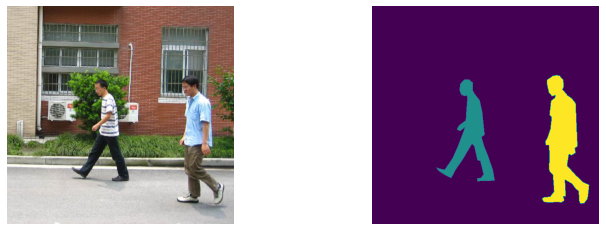

In [ ]:
from PIL import Image
img  = np.asarray(Image.open('PennFudanPed/PNGImages/FudanPed00001.png'))
mask = np.asarray(Image.open('PennFudanPed/PedMasks/FudanPed00001_mask.png'))
_,axs = plt.subplots(1,2,figsize=(12,4));
axs[0].imshow(img); axs[0].axis('off');
axs[1].imshow(mask); axs[1].axis('off');plt.show()

Создадим функцию загрузки набора данных в формате `COCO`. Для этого функция будет загружать изображение и маску.В рамках данной функции мы преобразуем маску в растровом формате в ограничивающую рамку (`mask2box`) и в полигон (`find_contours`). Результат сформируем аналогично примеру с набором данных balloon.

In [ ]:
import os
import numpy as np
import torch
import torch.utils.data
from PIL import Image
from skimage.measure import find_contours

def mask2box(mask):
    pos = np.where(mask)
    xmin, xmax = np.min(pos[1]), np.max(pos[1])
    ymin, ymax = np.min(pos[0]), np.max(pos[0])
    return xmin, ymin,xmax-xmin, ymax-ymin

def pedestrian2COCO(root):

    imgs  = list(sorted(os.listdir(os.path.join(root, "PNGImages"))))
    masks = list(sorted(os.listdir(os.path.join(root, "PedMasks"))))
    dataset_dicts = []
    for idx_im,(img_name, mask_name) in enumerate(zip(imgs, masks)):
        
        record = {}
        
        img_path  = os.path.join(root, "PNGImages", img_name)
        mask_path = os.path.join(root, "PedMasks",  mask_name)
        
        img  = np.array(Image.open(img_path).convert("RGB"))
        mask = np.array(Image.open(mask_path))
        obj_idxs = np.unique(mask)[1:]
        masks    = mask == obj_idxs[:, None, None]
        num_objs = len(obj_idxs)

        height, width = img.shape[:2]
        
        record["file_name"] = img_path
        record["image_id"]  = idx_im
        record["height"]    = height
        record["width"]     = width
        
        objs = []
        for mask in masks:#range(num_objs):
            poly = find_contours(mask.T)[0].reshape(-1,1).squeeze()
            obj = {
                "bbox": [*mask2box(mask)],
#                 "bbox_mode": BoxMode.XYWH_ABS,
                "segmentation": [poly],
                "category_id": 0,
            }
            objs.append(obj)
        record["annotations"] = objs
        dataset_dicts.append(record)
    return dataset_dicts, masks

Так как набор данных не разделен на тренировочную и тестовую часть сделаем это сами. 

In [ ]:
dataset_dicts, masks = pedestrian2COCO('./PennFudanPed')
data_train = dataset_dicts[:-50]
val_train  = dataset_dicts[-50:]
print('train data: ',len(data_train))
print('valid data: ',len(val_train))

train data:  120
valid data:  50


Проверим работоспособность модели.

./PennFudanPed/PNGImages/FudanPed00012.png


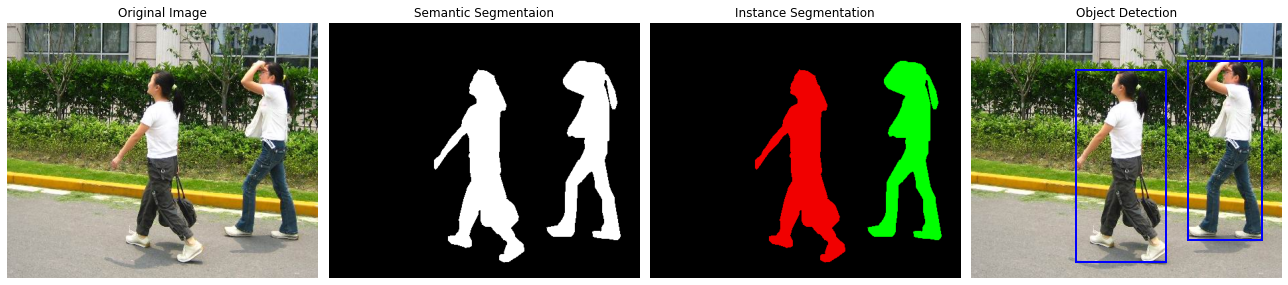

In [ ]:
d = dataset_dicts[11]
print(d['file_name'])
image = np.asarray(Image.open(d["file_name"]))
masks_ = get_masks(d)
boxes_ = get_bboxes(d)
plot_instant(image, masks_, boxes_) 